In [148]:
import sys
import os
# Add the 'scripts/' directory to the system path
sys.path.append(os.path.abspath('../triple_mbhb'))

In [149]:
import Trip_utils as util
import numpy as np
import Triple_dynamics as Tr
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import merger_rate_calculate as mr
import scipy as sp

In [150]:
import scienceplots
plt.style.use(['science']) 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [151]:
import pickle
Nruns = 100

iso_filename = os.path.abspath('../obj_data/iso_bin.pkl')
weak_tr_filename = os.path.abspath('../obj_data/weak_tr.pkl')
strong_tr_filename =os.path.abspath(f'../obj_data/tr{Nruns}.pkl')
stalled_tr_filename=os.path.abspath(f'../obj_data/stalled{Nruns}.pkl')

with open(iso_filename, 'rb') as f:
    iso_bin = pickle.load(f)

with open(weak_tr_filename, 'rb') as f:
    weak_tr = pickle.load(f)

with open(strong_tr_filename, 'rb') as f:
    strong_tr = pickle.load(f)

with open(stalled_tr_filename, 'rb') as f:
    stalled_objs = pickle.load(f)

In [152]:
print(f"Number of iso binaries is {iso_bin.N_iso_binaries} and it is {iso_bin.N_iso_binaries/9234*100:.2f} %")
print(f"Number of weak triples is {weak_tr.N_weak_triples} and it is {weak_tr.N_weak_triples/9234*100:.2f} %")

Number of iso binaries is 7205 and it is 78.03 %
Number of weak triples is 1509 and it is 16.34 %


### Strong triple stats

In [6]:
strong_tr_tot_merger = util.Trip_stats(strong_tr)

Average prompt merger is 110.17 which is 21.19 %
Average merger after ejection is 189.21 which is 36.39 %
There are 220.62 no mergers on average which is 42.43%
Average total mergers is 299.38 which is 57.57 %
----------------------
Without triple interactions 210(40.4)% strong triple inner binary merges with just inspiral
With triple interactions added 299.4(57.6)% strong triple system has mergers which is a 17.2 % increase in mergers
209.9 (40.4%) strong triple induced mergers are otherwise non mergers under binary inspiral evolution.


In [10]:
np.mean(merger_rates,axis=0)

array([0.00768025, 0.01835792])

In [11]:
merger_rates = [
   obj.total_merger_rate("all", zbinsize=0.1, zmax=7) for obj in tqdm(strong_tr, desc="Calculating Merger Rates")
]
strong_triple_merger_rate,strong_triple_cum_merger_rate = np.mean(merger_rates,axis=0)

iso_bin_merger_rate,iso_bin_cum_merger_rate = iso_bin.total_merger_rate(zbinsize=0.1, zmax=7)
weak_triples_merger_rate,weak_triples_cum_merger_rate = weak_tr.total_merger_rate(zbinsize=0.1, zmax=7)

Calculating Merger Rates: 100%|██████████| 100/100 [00:03<00:00, 25.36it/s]


In [15]:
total_merger_rate = strong_triple_merger_rate+iso_bin_merger_rate+weak_triples_merger_rate

print(f"Merger rate considering only isolated binaries is {iso_bin_merger_rate:.3f} yr^-1")
print(f"Merger rate of weak triples is {weak_triples_merger_rate:.4f} yr^-1")
print(f"Total strong triple merger rate is : {strong_triple_merger_rate:.4f} yr^{-1}")
#print(f"Merger rate increases from {iso_bin_merger_rate:.2f} to {iso_bin_merger_rate+strong_triple_merger_rate:.2f} which is {strong_triple_merger_rate/iso_bin_merger_rate * 100:.1f} % increase when we add strong triples ")
#print(f"After adding both strong and weak triples the merger rate is {total_merger_rate:.2f} which is a {(total_merger_rate-iso_bin_merger_rate)/iso_bin_merger_rate * 100:.1f} % increase")
print(f"Total merger rate including strong and weak triples is {total_merger_rate:.3f} yr^-1")
z_triple_inspiral = strong_tr[0].z_triple_merger[strong_tr[0].bin_merge_flag]
print(f"The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly {mr.merger_rate_find(z_triple_inspiral,zbinsize=0.2, zmax=7)[0]:.4f} yr^{-1}")

Merger rate considering only isolated binaries is 0.132 yr^-1
Merger rate of weak triples is 0.0079 yr^-1
Total strong triple merger rate is : 0.0077 yr^-1
Total merger rate including strong and weak triples is 0.148 yr^-1
The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly 0.0059 yr^-1


In [20]:
cum_merger_rate = strong_triple_cum_merger_rate+iso_bin_cum_merger_rate+weak_triples_cum_merger_rate

print(f"Merger rate considering only isolated binaries is {iso_bin_cum_merger_rate:.3f} yr^-1")
print(f"Merger rate of weak triples is {weak_triples_cum_merger_rate:.3f} yr^-1")
print(f"Total strong triple merger rate is : {strong_triple_cum_merger_rate:.3f} yr^{-1}")
#print(f"Merger rate increases from {iso_bin_merger_rate:.2f} to {iso_bin_merger_rate+strong_triple_merger_rate:.2f} which is {strong_triple_merger_rate/iso_bin_merger_rate * 100:.1f} % increase when we add strong triples ")
#print(f"After adding both strong and weak triples the merger rate is {total_merger_rate:.2f} which is a {(total_merger_rate-iso_bin_merger_rate)/iso_bin_merger_rate * 100:.1f} % increase")
print(f"Total merger rate including strong and weak triples is {cum_merger_rate:.3f} yr^-1")
z_triple_inspiral = strong_tr[0].z_triple_merger[strong_tr[0].bin_merge_flag]
print(f"The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly {mr.merger_rate_find(z_triple_inspiral,zbinsize=0.2, zmax=7)[1]:.4f} yr^{-1}")

Merger rate considering only isolated binaries is 0.366 yr^-1
Merger rate of weak triples is 0.017 yr^-1
Total strong triple merger rate is : 0.018 yr^-1
Total merger rate including strong and weak triples is 0.402 yr^-1
The merger rate for strong triples under inspiral evolution (without considering strong interaction) is roughly 0.0144 yr^-1


In [21]:
Nmergers = []
Nmbhb = 9234
for i in range(Nruns):
    Nmergers.append(np.sum(iso_bin.merger_flag)+np.sum(weak_tr.bin_merge_flag)+np.sum(strong_tr[i].merger_mask))
print(f"The total number of mergers in the population is {np.mean(Nmergers):.0f} out of {Nmbhb}")

The total number of mergers in the population is 4561 out of 9234


In [22]:
Nmbhb = 9234
print(f"There are {stalled_objs[0].N_stalled_triples}({stalled_objs[0].N_stalled_triples/Nmbhb * 100:.2f}%)stalled binary systems that forms possible triple systems from {Nmbhb} total systems")

prompt_merger = 0
merger_after_ejections = 0

for i in range(Nruns):
    prompt_merger+=stalled_objs[i].prompt_merger
    merger_after_ejections+= stalled_objs[i].merger_after_ejection

prompt_merger = prompt_merger/Nruns
merger_after_ejections = merger_after_ejections/Nruns
Total_mergers_in_stalled = prompt_merger+merger_after_ejections
#Total_mergers_in_stalled = prompt_merger

iso_bin_mergers = np.sum(iso_bin.merger_flag)
weak_tr_bin_mergers = np.sum(weak_tr.merger_mask)
strong_trip_insp_mergers = np.sum(strong_tr[0].bin_merge_flag)

#print(f"{Total_mergers_in_stalled/Nmbhb * 100:.1f} % mergers in stalled model")
print(f"There are a total of {Total_mergers_in_stalled:.0f} ({Total_mergers_in_stalled/Nmbhb * 100:.2f} %)triple-induced mergers")
print(f"{(iso_bin_mergers+weak_tr_bin_mergers+strong_tr_tot_merger)/Nmbhb * 100:.1f} % mergers in fiducial (iso+triples) model")
print(f"{(iso_bin_mergers)/Nmbhb * 100:.1f} % mergers in isolated binary evolution")
print(f"{(iso_bin_mergers+weak_tr_bin_mergers+strong_trip_insp_mergers)/Nmbhb * 100:.1f} % mergers in inspiral evolution")

There are 3884(42.06%)stalled binary systems that forms possible triple systems from 9234 total systems
There are a total of 1059 (11.47 %)triple-induced mergers
49.4 % mergers in fiducial (iso+triples) model
42.0 % mergers in isolated binary evolution
48.4 % mergers in inspiral evolution


In [23]:
merger_rates = [
   obj.total_merger_rate("all", zbinsize=0.2, zmax=7) for obj in tqdm(stalled_objs, desc="Calculating Merger Rates")
]
stalled_triple_merger_rate,stalled_cum_merger_rate = np.mean(merger_rates,axis=0)

Calculating Merger Rates: 100%|██████████| 100/100 [00:06<00:00, 14.47it/s]


In [25]:
print(f"The total merger rate in the stalled model is {stalled_triple_merger_rate:.3f} yr^{-1}")
print(f"The total merger rate in the fiducial (isolated binary+triple) model is {total_merger_rate:.2f} yr^{-1}")
print(f"The merger rate is suppressed by a factor of {total_merger_rate/stalled_triple_merger_rate:.1f}.")

The total merger rate in the stalled model is 0.032 yr^-1
The total merger rate in the fiducial (isolated binary+triple) model is 0.15 yr^-1
The merger rate is suppressed by a factor of 4.6.


The merger rate files are saved at /Users/pranavsatheesh/Triples/Github/Illustris_Data/


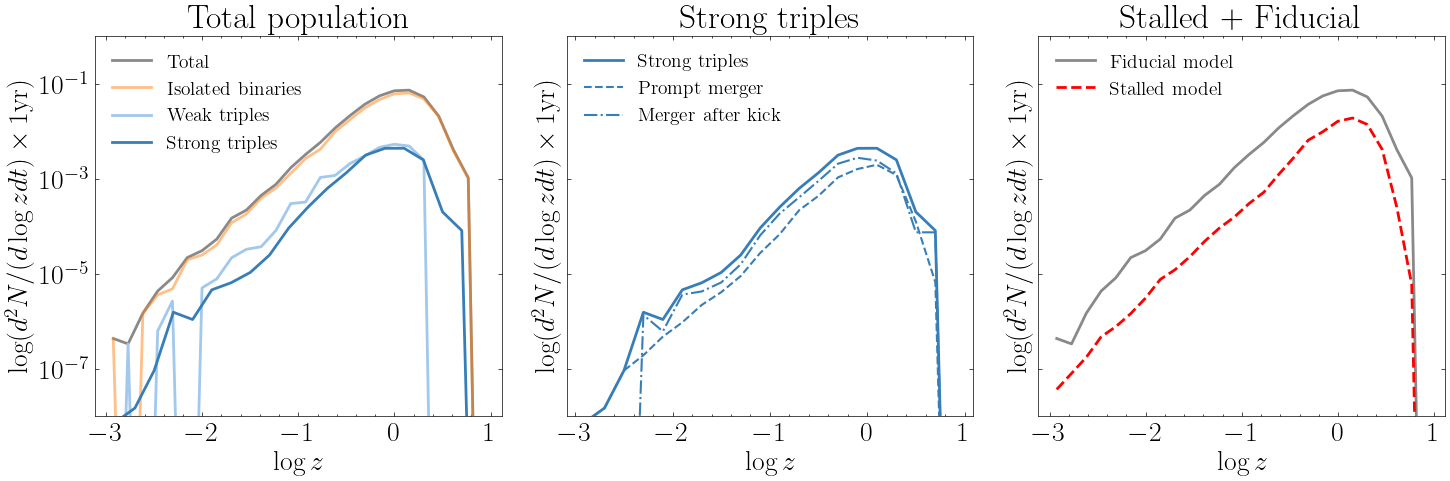

In [15]:
fig,axes = Tr.plot_merger_rates(strong_tr,weak_tr,iso_bin,stalled_objs,Nruns)
# axes[2].set_ylim(1e-8,1)
# axes[0].set_ylim(1e-8,1)
# axes[1].set_ylim(1e-8,1)
fig.tight_layout()
axes[1].set_title("Strong triples")
axes[0].set_title("Total population")
axes[2].set_title("Stalled + Fiducial")
fig.savefig(f"../Figures/Merger_rate_w_stalled_N_{Nruns:d}.pdf")

The merger rate files are saved at /Users/pranavsatheesh/Triples/Github/Illustris_Data/


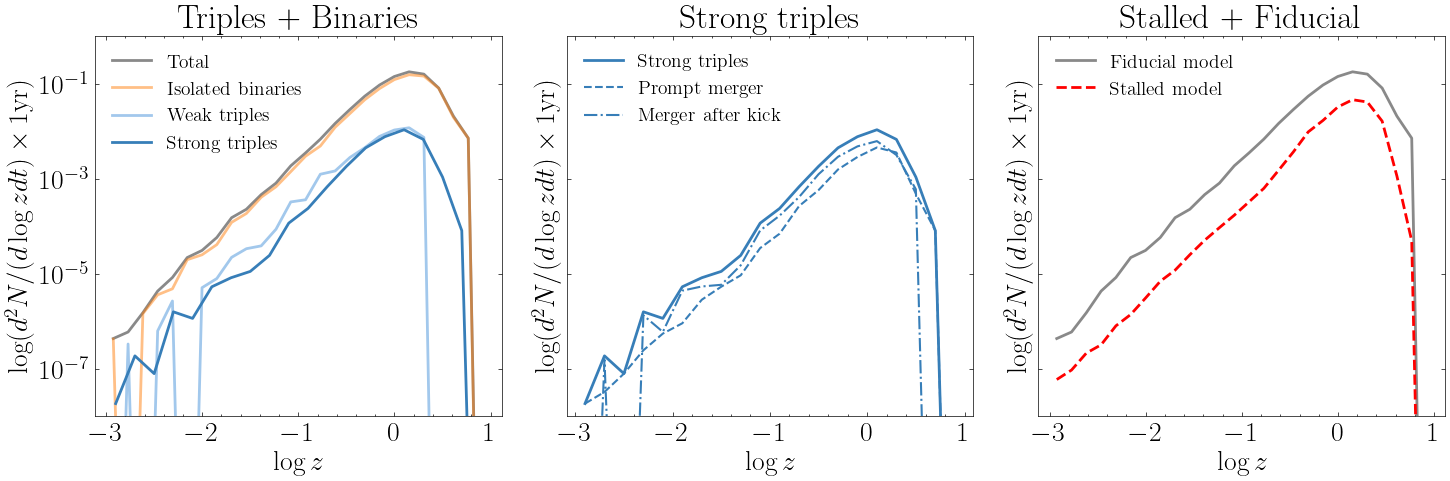

In [14]:
fig,axes = Tr.plot_merger_rates(strong_tr,weak_tr,iso_bin,stalled_objs,Nruns)
# axes[2].set_ylim(1e-8,1)
# axes[0].set_ylim(1e-8,1)
# axes[1].set_ylim(1e-8,1)
fig.tight_layout()
axes[1].set_title("Strong triples")
axes[0].set_title("Triples + Binaries")
axes[2].set_title("Stalled + Fiducial")
fig.savefig(f"../Figures/Merger_rate_w_stalled_N_{Nruns:d}.pdf")

### Massive Major merger population

In [153]:
iso_masssive_mask =  ((iso_bin.M1+iso_bin.M2)>1e8)&(iso_bin.qin>=0.1)&(iso_bin.merger_mask)
iso_massive_merger_rate,iso_massive_cum_merger_rate = mr.merger_rate_find(iso_bin.z_merger[iso_masssive_mask],zbinsize=0.2, zmax=7)
lgz_iso,dndlogz_iso_massive = mr.diff_merger_rate(iso_bin.z_merger[iso_masssive_mask],lgzbinsize=0.15,lgzmin=-3,lgzmax=1.0)
print(f"The merger rate of massive major mergers in isolated binaries is {iso_massive_merger_rate:.4f} yr^-1")
print(f"{np.sum(iso_masssive_mask)/iso_bin.N_iso_binaries * 100:.1f} % of isolated binaries are massive major mergers")

The merger rate of massive major mergers in isolated binaries is 0.0121 yr^-1
6.7 % of isolated binaries are massive major mergers


In [154]:
weak_tr_massive_mask = ((weak_tr.M1+weak_tr.M2)>1e8)&(weak_tr.qin>=0.1)&(weak_tr.merger_mask)
weak_tr_massive_merger_rate,weak_tr_massive_cum_erger_rate = mr.merger_rate_find(weak_tr.z_merger[weak_tr_massive_mask],zbinsize=0.2, zmax=7)
lgz_weak,dndlogz_weak_massive = mr.diff_merger_rate(weak_tr.z_merger[weak_tr.merger_mask],lgzbinsize=0.25,lgzmin=-3,lgzmax=1.0)
print(f"The merger rate of massive major mergers in weak triple inner binaries is {weak_tr_massive_merger_rate:.4f} yr^-1")
print(f"{np.sum(weak_tr_massive_mask)/weak_tr.N_weak_triples * 100:.1f} % of weak triples are massive major mergers")

The merger rate of massive major mergers in weak triple inner binaries is 0.0013 yr^-1
2.9 % of weak triples are massive major mergers


In [155]:
strong_tr_massive_merger_rates = []
strong_tr_massive_Ns = []
dNdlogzdt_strong_massive = []

for i in range(Nruns):
    strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
    strong_tr_massive_Ns.append(np.sum(strong_triple_massive_mask))
    strong_tr_massive_merger_rates.append(mr.merger_rate_find(strong_tr[i].z_triple_merger[strong_triple_massive_mask],zbinsize=0.2, zmax=7))
    lgzbins_strong,dNdlogzdt_strong_tmp =mr.diff_merger_rate(strong_tr[i].z_triple_merger[strong_triple_massive_mask],lgzbinsize=0.2,lgzmin=-3,lgzmax=1.0)
    dNdlogzdt_strong_massive.append(dNdlogzdt_strong_tmp)

print(f"{np.mean(strong_tr_massive_Ns)/520 * 100:.1f} % of strong triples are massive major mergers")
print(f"The strong triple merger rate is {np.mean(strong_tr_massive_merger_rates,axis=0)[0]:.4f} yr^-1")

20.3 % of strong triples are massive major mergers
The strong triple merger rate is 0.0028 yr^-1


In [156]:
massive_total_merger_rate = iso_massive_merger_rate+weak_tr_massive_merger_rate+np.mean(strong_tr_massive_merger_rates,axis=0)[0]
print(f"Total merger rate in the massive major mergers is {massive_total_merger_rate:.4f} yr^-1")
print(f"Iso mergers :{iso_massive_merger_rate/massive_total_merger_rate*100:.1f}%")
print(f"weak triple mergers :{weak_tr_massive_merger_rate/massive_total_merger_rate*100:.1f}%")
print(f"strong triple mergers:{np.mean(strong_tr_massive_merger_rates,axis=0)[0]/massive_total_merger_rate*100:.1f}%")

Total merger rate in the massive major mergers is 0.0162 yr^-1
Iso mergers :74.8%
weak triple mergers :8.1%
strong triple mergers:17.1%


In [186]:
def optimized_fixed_bins_fraction(logz_strong, logz_total, lgzmin, lgzmax, initial_binsize, min_mergers):
    """
    Finds an optimized bin size such that each bin has at least min_mergers 
    and computes the fraction of strong mergers (N_strong / N_total) for each bin.
    The bin size is consistent across the entire range, except for the first bin, 
    which can have fewer than min_mergers.
    """
    optimized_binsize = initial_binsize
    
    # Initialize the binning with the starting bin size
    while True:
        bins = np.arange(lgzmin - optimized_binsize, lgzmax + optimized_binsize, optimized_binsize)
        total_bin_counts, bin_edges = np.histogram(logz_total, bins=bins)
        strong_bin_counts, _ = np.histogram(logz_strong, bins=bin_edges)
        
        # Allow the first bin to have less than the minimum mergers
        if np.all(total_bin_counts[1:] >= min_mergers):  # Only check bins after the first
            break  # The bin size is adequate, so we stop
        else:
            optimized_binsize *= 1.1  # Increase the bin size slightly

    # Compute the fraction of strong mergers
    fraction_strong = np.zeros_like(total_bin_counts, dtype=float)
    non_zero_mask = total_bin_counts > 0
    fraction_strong[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]
    
    # Calculate bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, fraction_strong, bin_edges, optimized_binsize


In [187]:
min_z = []
for i in range(Nruns):
    min_z.append([i,np.min(np.log10(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask]))])
min_z = np.array(min_z)

In [188]:
min_run = np.argmin(min_z[:,1])
print(min_run,np.min(min_z[:,1]))

76 -4.436046208350423


In [189]:
# Set parameters
#min_mergers = 5  # Minimum mergers per bin
lgzmin = -4      # Minimum log10 redshift
lgzmax = 1       # Maximum log10 redshift
initial_binsize = 0.01  # Initial bin size

# Accumulators for averaged results
accumulated_fraction_strong = []
accumulated_fraction_strong_massive = []
#final_bin_edges = None

i = min_run

strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
logz_strong_massive = np.log10(strong_tr[i].z_triple_merger[strong_triple_massive_mask])
logz_total_massive = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_triple_massive_mask],
                                                  iso_bin.z_merger[iso_masssive_mask]]))
    
lgzbins_massive, fraction_strong_massive, final_bin_edges_massive, optimized_binsize_massive = optimized_fixed_bins_fraction(
logz_strong_massive, logz_total_massive, lgzmin, lgzmax, initial_binsize=0.01, min_mergers=1)


logz_strong = np.log10(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask])
logz_total = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_tr[i].merger_mask],
                                          iso_bin.z_merger[iso_bin.merger_mask]]))

    # Apply the optimized fixed bins function for all mergers
lgzbins, fraction_strong, final_bin_edges, optimized_binsize = optimized_fixed_bins_fraction(
        logz_strong, logz_total, lgzmin, lgzmax, initial_binsize=0.01, min_mergers=10)

print(optimized_binsize,optimized_binsize_massive)
optimized_binsize = optimized_binsize-0.5

for i in range(Nruns):
    #bins = np.arange(lgzmin - optimized_binsize, lgzmax + optimized_binsize, optimized_binsize)
    strong_triple_massive_mask = (strong_tr[i].qin_merger>=0.1)&(strong_tr[i].mbin_merger>1e8)&strong_tr[i].merger_mask
    logz_strong_massive = np.log10(strong_tr[i].z_triple_merger[strong_triple_massive_mask])
    logz_total_massive = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_triple_massive_mask],
                                                  iso_bin.z_merger[iso_masssive_mask]]))
    total_bin_counts, bin_edges = np.histogram(logz_total_massive, bins=final_bin_edges_massive)
    strong_bin_counts, _ = np.histogram(logz_strong_massive, bins=final_bin_edges_massive)

    fraction_strong_massive = np.zeros_like(total_bin_counts, dtype=float)
    non_zero_mask = total_bin_counts > 0
    fraction_strong_massive[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]
    accumulated_fraction_strong_massive.append(fraction_strong_massive)

    logz_strong = np.log10(strong_tr[i].z_triple_merger[strong_tr[i].merger_mask])
    logz_total = np.log10(np.concatenate([strong_tr[i].z_triple_merger[strong_tr[i].merger_mask],
                                          iso_bin.z_merger[iso_bin.merger_mask]]))
    
    total_bin_counts, bin_edges = np.histogram(logz_total, bins=final_bin_edges)
    strong_bin_counts, _ = np.histogram(logz_strong, bins=final_bin_edges)
    
    
    fraction_strong = np.zeros_like(total_bin_counts, dtype=float)
    non_zero_mask = total_bin_counts > 0
    fraction_strong[non_zero_mask] = strong_bin_counts[non_zero_mask] / total_bin_counts[non_zero_mask]
    accumulated_fraction_strong.append(fraction_strong)


1.4204293198443187 1.2912993816766534


In [190]:
massive_color_palette = {"all":"#009E73","strong":"#D55E00"}

In [191]:
strong_fraction = np.mean(accumulated_fraction_strong,axis=0)
strong_fraction_massive = np.mean(accumulated_fraction_strong_massive,axis=0)

In [163]:
strong_fraction[strong_fraction<=0.02] = 0
strong_fraction_massive[strong_fraction_massive<=0.02] = 0

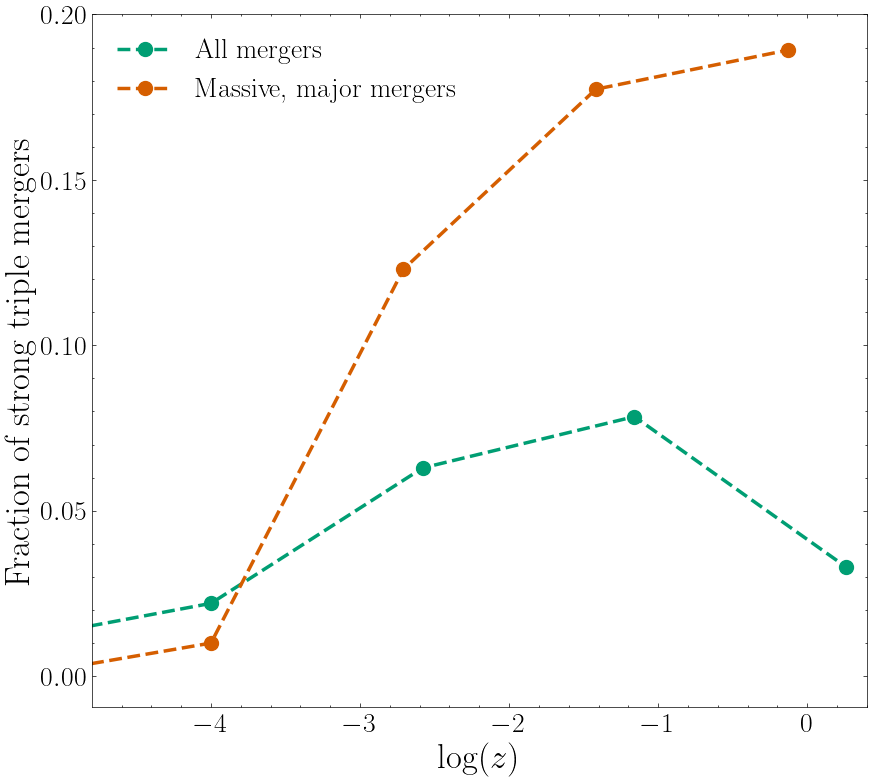

In [202]:
plt.figure(figsize=(10,9))
plt.plot(final_bin_edges[:-1], strong_fraction, marker="o", linestyle="--", markersize=10, color=massive_color_palette['all'], linewidth=2.5, label='All mergers')
plt.plot(final_bin_edges_massive[:-1],strong_fraction_massive, marker="o", linestyle="--", markersize=10,color=massive_color_palette['strong'], linewidth=2.5, label='Massive, major mergers')
plt.xlabel('$\log(z)$',fontsize=25)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.xlim(-4.8,0.4)
plt.ylabel('Fraction of strong triple mergers',fontsize=25)
plt.legend(loc="upper left")
plt.savefig("../Figures/fraction_of_strong_triples_massive_vs_all.pdf")

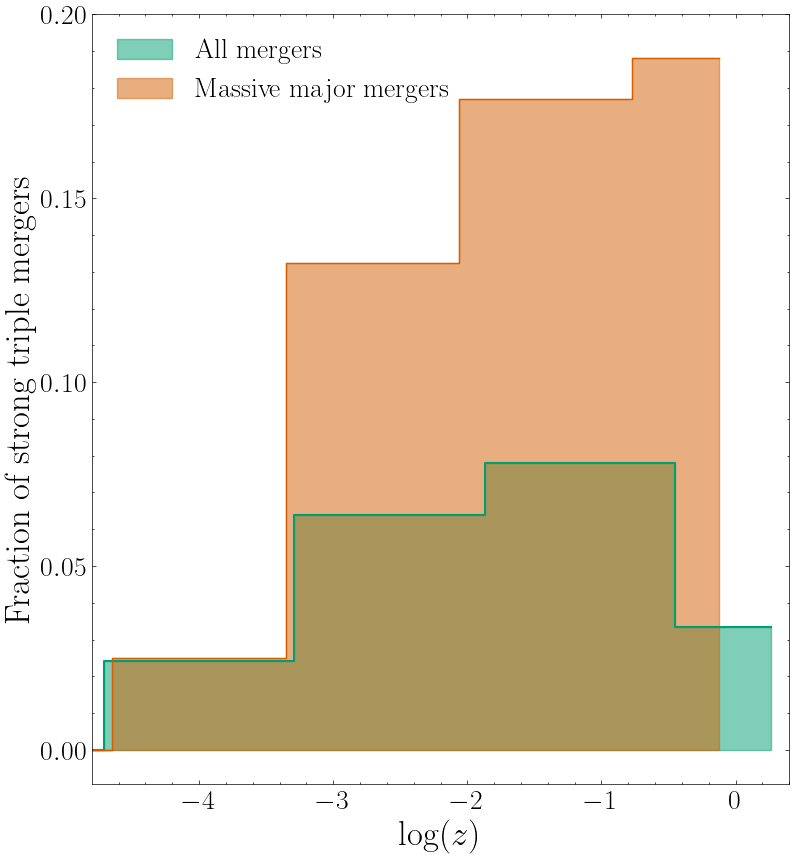

In [145]:
plt.figure(figsize=(9,10))
plt.step(final_bin_edges[:-1],strong_fraction,where="mid",color=massive_color_palette['all'],linewidth=1.5)
plt.fill_between(final_bin_edges[:-1], 
                 strong_fraction, 
                 step="mid", alpha=0.5, color=massive_color_palette['all'], label='All mergers')
plt.step(final_bin_edges_massive[:-1],strong_fraction_massive,where="mid",color=massive_color_palette['strong'])
plt.fill_between(final_bin_edges_massive[:-1], 
                 strong_fraction_massive, 
                 step="mid", alpha=0.5, color=massive_color_palette['strong'], label='Massive major mergers')

plt.xlabel('$\log(z)$',fontsize=25)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.xlim(-4.8,0.4)
plt.ylabel('Fraction of strong triple mergers',fontsize=25)
plt.legend(loc="upper left")
plt.savefig("../Figures/fraction_of_strong_triples_massive_vs_all_dist.pdf")

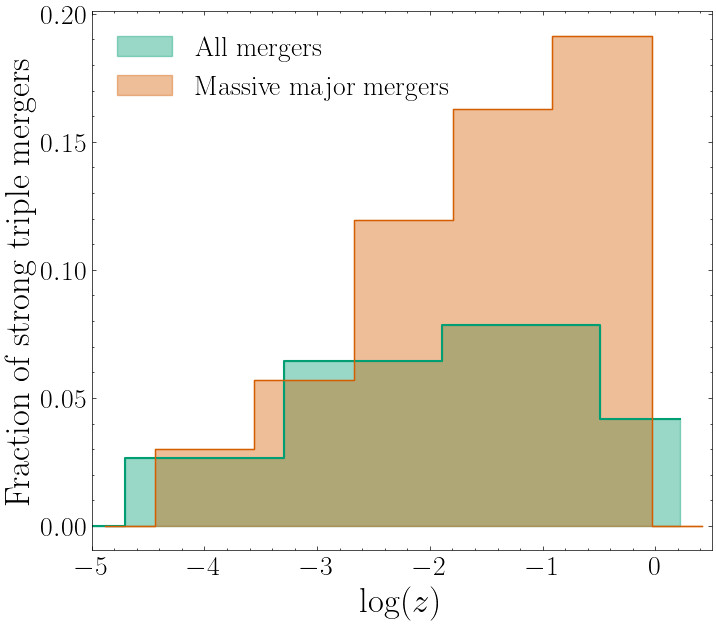

In [67]:
plt.figure(figsize=(8,7))
plt.step(final_bin_edges[:-1],strong_fraction,where="mid",color=massive_color_palette['all'],linewidth=1.5)
plt.fill_between(final_bin_edges[:-1], 
                 strong_fraction, 
                 step="mid", alpha=0.4, color=massive_color_palette['all'], label='All mergers')
plt.step(final_bin_edges_massive[:-1],strong_fraction_massive,where="mid",color=massive_color_palette['strong'])
plt.fill_between(final_bin_edges_massive[:-1], 
                 strong_fraction_massive, 
                 step="mid", alpha=0.4, color=massive_color_palette['strong'], label='Massive major mergers')

plt.xlabel('$\log(z)$',fontsize=25)
plt.yticks([0,0.05,0.1,0.15,0.20])
plt.xlim(-5,0.5)
plt.ylabel('Fraction of strong triple mergers',fontsize=25)
plt.legend(loc="upper left")
plt.savefig("../Figures/fraction_of_strong_triples_massive_vs_all_dist.pdf")